In [1]:
import numpy as np

from fjsp_env import StochasticFJSP
from stochastic_arrival_times import calculate_problem_release_times
from debug_gantt_chart import draw_gantt_chart, get_machine_op_durations, calculate_horizon_with_arrival_times

env = StochasticFJSP(3, 3, 3)
problem = np.array(
    [
        [
            [1, 3, 2],
            [0, 2, 1],
            [0, 0, 3],
        ],
        [
            [0, 0, 2],
            [2, 2, 1],
            [0, 0, 0]
        ],
        [
            [2, 1, 0],
            [1, 0, 1],
            [3, 0, 0]
        ]
    ], dtype=np.int32
)
release_times = calculate_problem_release_times(problem, 0.95, problem.shape[0], problem.shape[2])
release_times = np.array([4, 6, 7], dtype=np.int32)

In [2]:
env.reset(problem, 3, release_times)

(array([[1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32),
 array([[0.005, 0.007, 0.006, 0.   ],
        [0.   , 0.007, 0.006, 0.   ],
        [0.   , 0.   , 0.009, 0.   ],
        [0.   , 0.   , 0.008, 0.   ],
        [0.01 , 0.01 , 0.009, 0.   ],
        [0.009, 0.008, 0.   , 0.   ],
        [0.009, 0.   , 0.009, 0.   ],
        [0.012, 0.   , 0.   , 0.   ]]),
 [[0, 0], [0, 1], [0, 2], [3, 0], [3, 1], [3, 2], [5, 0], [5, 1], [5, 2]],
 array([False, False, False,  True,  True, False, False, False,  True]),
 array([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1.

In [3]:
machine_op_durations = get_machine_op_durations(
    env.machine_op_ids,
    env.jobs,
    env.op_id_to_job_info
)
horizon = calculate_horizon_with_arrival_times(env.jobs, env.job_release_times)

In [4]:
i = 1
print(env.lower_bounds)
def step_and_print(action):
    global i
    print(f'ACTION {i}- OPERATION {action[0]} | MACHINE {action[1]}')
    adj, fea, reward, done, omega, mask, machine_feat = env.step((action[0] - 1, action[1] - 1))
    machine_op_durations = get_machine_op_durations(
        env.machine_op_ids,
        env.jobs,
        env.op_id_to_job_info
    )
    print(env.lower_bounds)
    print(machine_feat)
    draw_gantt_chart(
        horizon,
        env.machine_start_times,
        machine_op_durations,
        env.machine_op_ids,
        env.op_id_to_job_info,
        env.number_of_jobs
    )
    i += 1

[[[ 5  7  6]
  [ 0  7  6]
  [ 0  0  9]]

 [[ 0  0  8]
  [10 10  9]
  [ 0  0  0]]

 [[ 9  8  0]
  [ 9  0  9]
  [12  0  0]]]


ACTION 1- OPERATION 1 | MACHINE 2
[[[ 7.  7.  7.]
  [ 0.  9.  8.]
  [ 0.  0. 11.]]

 [[ 0.  0.  8.]
  [10. 10.  9.]
  [ 0.  0.  0.]]

 [[ 9.  8.  0.]
  [ 9.  0.  9.]
  [12.  0.  0.]]]
[[0. 0. 0. 7.]
 [1. 0. 3. 4.]
 [1. 0. 0. 7.]
 [0. 0. 0. 7.]
 [0. 0. 3. 4.]
 [1. 0. 0. 7.]
 [1. 0. 0. 7.]
 [1. 0. 3. 4.]
 [0. 0. 0. 7.]]


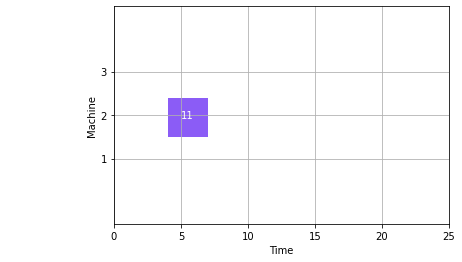

ACTION 2- OPERATION 2 | MACHINE 3
[[[ 7.  7.  7.]
  [ 8.  8.  8.]
  [ 0.  0. 11.]]

 [[ 0.  0.  8.]
  [10. 10.  9.]
  [ 0.  0.  0.]]

 [[ 9.  8.  0.]
  [ 9.  0.  9.]
  [12.  0.  0.]]]
[[0. 0. 0. 8.]
 [0. 0. 3. 5.]
 [1. 0. 1. 7.]
 [0. 0. 0. 8.]
 [0. 0. 3. 5.]
 [1. 0. 1. 7.]
 [1. 0. 0. 8.]
 [1. 0. 3. 5.]
 [0. 0. 1. 7.]]


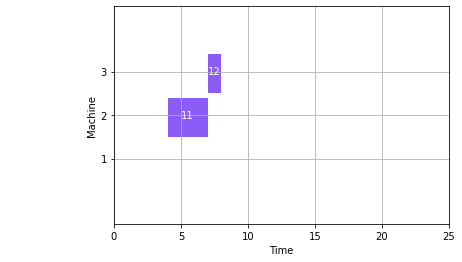

ACTION 3- OPERATION 4 | MACHINE 3
[[[ 7.  7.  7.]
  [ 8.  8.  8.]
  [ 0.  0. 11.]]

 [[10. 10. 10.]
  [12. 12. 11.]
  [ 0.  0.  0.]]

 [[ 9.  8.  0.]
  [ 9.  0.  9.]
  [12.  0.  0.]]]
[[ 0.  0.  0. 10.]
 [ 0.  0.  3.  7.]
 [ 1.  2.  3.  7.]
 [ 1.  0.  0. 10.]
 [ 1.  0.  3.  7.]
 [ 1.  0.  3.  7.]
 [ 1.  0.  0. 10.]
 [ 1.  0.  3.  7.]
 [ 0.  0.  3.  7.]]


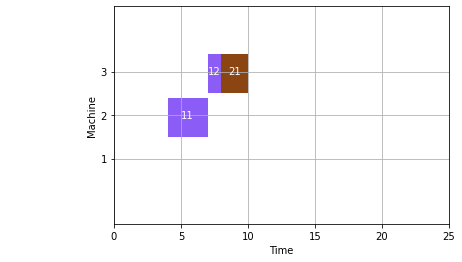

ACTION 4- OPERATION 3 | MACHINE 3
[[[ 7.  7.  7.]
  [ 8.  8.  8.]
  [13. 13. 13.]]

 [[10. 10. 10.]
  [12. 12. 11.]
  [ 0.  0.  0.]]

 [[ 9.  8.  0.]
  [ 9.  0.  9.]
  [12.  0.  0.]]]
[[ 0.  0.  0. 13.]
 [ 0.  0.  3. 10.]
 [ 0.  0.  6.  7.]
 [ 1.  0.  0. 13.]
 [ 1.  0.  3. 10.]
 [ 1.  3.  6.  7.]
 [ 1.  0.  0. 13.]
 [ 1.  0.  3. 10.]
 [ 0.  0.  6.  7.]]


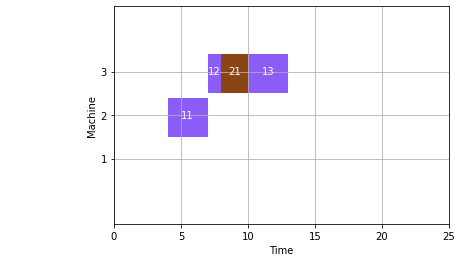

ACTION 5- OPERATION 5 | MACHINE 1
[[[ 7.  7.  7.]
  [ 8.  8.  8.]
  [13. 13. 13.]]

 [[10. 10. 10.]
  [12. 12. 12.]
  [ 0.  0.  0.]]

 [[ 9.  8.  0.]
  [ 9.  0.  9.]
  [12.  0.  0.]]]
[[ 0.  0.  2. 11.]
 [ 0.  0.  3. 10.]
 [ 0.  0.  6.  7.]
 [ 0.  0.  2. 11.]
 [ 0.  0.  3. 10.]
 [ 0.  0.  6.  7.]
 [ 1.  5.  2. 11.]
 [ 1.  0.  3. 10.]
 [ 0.  0.  6.  7.]]


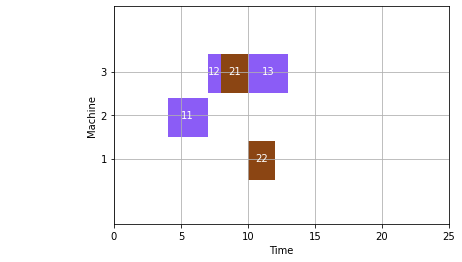

ACTION 6- OPERATION 6 | MACHINE 1
[[[ 7.  7.  7.]
  [ 8.  8.  8.]
  [13. 13. 13.]]

 [[10. 10. 10.]
  [12. 12. 12.]
  [ 0.  0.  0.]]

 [[ 9.  9.  9.]
  [10.  0. 10.]
  [13.  0.  0.]]]
[[ 0.  0.  4.  9.]
 [ 0.  0.  3. 10.]
 [ 0.  0.  6.  7.]
 [ 0.  0.  4.  9.]
 [ 0.  0.  3. 10.]
 [ 0.  0.  6.  7.]
 [ 1.  3.  4.  9.]
 [ 0.  0.  3. 10.]
 [ 1.  0.  6.  7.]]


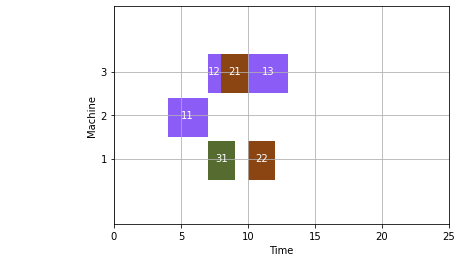

ACTION 7- OPERATION 7 | MACHINE 1
[[[ 7.  7.  7.]
  [ 8.  8.  8.]
  [13. 13. 13.]]

 [[10. 10. 10.]
  [12. 12. 12.]
  [ 0.  0.  0.]]

 [[ 9.  9.  9.]
  [10. 10. 10.]
  [13.  0.  0.]]]
[[ 0.  0.  5.  8.]
 [ 0.  0.  3. 10.]
 [ 0.  0.  6.  7.]
 [ 0.  0.  5.  8.]
 [ 0.  0.  3. 10.]
 [ 0.  0.  6.  7.]
 [ 1.  2.  5.  8.]
 [ 0.  0.  3. 10.]
 [ 0.  0.  6.  7.]]


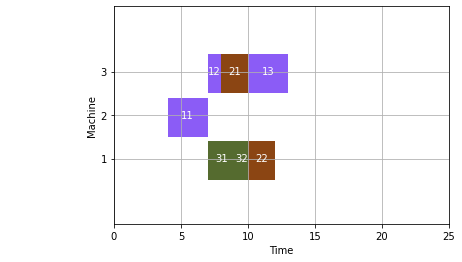

ACTION 8- OPERATION 8 | MACHINE 1
[[[ 7.  7.  7.]
  [ 8.  8.  8.]
  [13. 13. 13.]]

 [[10. 10. 10.]
  [12. 12. 12.]
  [ 0.  0.  0.]]

 [[ 9.  9.  9.]
  [10. 10. 10.]
  [15. 15. 15.]]]
[[ 0.  0.  8.  7.]
 [ 0.  0.  3. 12.]
 [ 0.  0.  6.  9.]
 [ 0.  0.  8.  7.]
 [ 0.  0.  3. 12.]
 [ 0.  0.  6.  9.]
 [ 0.  0.  8.  7.]
 [ 0.  0.  3. 12.]
 [ 0.  0.  6.  9.]]


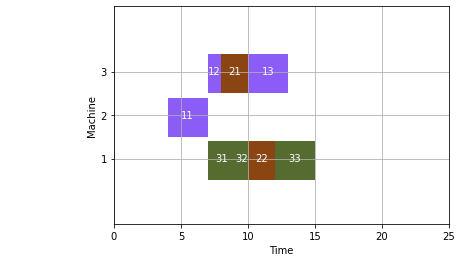

[False, False, False, False, False, True, True, False]


In [5]:
env.reset(problem, 3, release_times)
step_and_print((1, 2))
step_and_print((2, 3))
step_and_print((4, 3))
step_and_print((3, 3))
step_and_print((5, 1))
step_and_print((6, 1))
step_and_print((7, 1))
step_and_print((8, 1))
print(env.left_shifted_flags)